In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.ticker as mticker

In [2]:
session = cc.database.create_session()

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 21,Total memory: 765.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34887,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 21
Started: Just now,Total memory: 765.00 GiB
Comm: tcp://127.0.0.1:46295,Total threads: 3
Dashboard: /proxy/45219/status,Memory: 109.29 GiB
Nanny: tcp://127.0.0.1:34121,


In [4]:
# time period
start_time1 = '1985-01-01'
end_time1 = '1990-01-01'
start_time2 = '1990-01-01'
end_time2 = '1995-01-01'
start_time3 = '1995-01-01'
end_time3 = '2000-01-01'
start_time4 = '2000-01-01'
end_time4 = '2005-01-01'
start_time5 = '2005-01-01'
end_time5 = '2010-01-01'
start_time6= '2010-01-01'
end_time6 = '2015-01-01'

In [5]:
# laod 01 deg SSH
ssh1 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time1,end_time1)).sel(yt_ocean = slice(-90,-40))
ssh2 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time2,end_time2)).sel(yt_ocean = slice(-90,-40))
ssh3 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time3,end_time3)).sel(yt_ocean = slice(-90,-40))
ssh4 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time4,end_time4)).sel(yt_ocean = slice(-90,-40))
ssh5 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time5,end_time5)).sel(yt_ocean = slice(-90,-40))
ssh6 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time6,end_time6)).sel(yt_ocean = slice(-90,-40))

In [6]:
# load zonal trans
trans1 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time1,end_time1))
trans2 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time2,end_time2))
trans3 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time3,end_time3))
trans4 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time4,end_time4))
trans5 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time5,end_time5))
trans6 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time6,end_time6))

In [7]:
# load bathymetry
dz = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='dzt', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time1,end_time1))

2023-04-17 09:24:30,211 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-04-17 09:24:30,396 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
2023-04-17 09:24:30,581 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-04-17 09:24:30,755 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


In [8]:
# compute ssh
ssh1 = ssh1.mean('time').load()
ssh2 = ssh2.mean('time').load()
ssh3 = ssh3.mean('time').load()
ssh4 = ssh4.mean('time').load()
ssh5 = ssh5.mean('time').load()
ssh6 = ssh6.mean('time').load()

2023-04-17 09:24:56,267 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-04-17 09:25:33,679 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-04-17 09:25:40,330 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-04-17 09:26:14,232 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-04-17 09:26:19,648 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-04-17 09:26:40,008 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-04-17 09:26:52,919 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-04-17 09:27:04,504 - distributed.utils_perf - WARNING - full garbage collections took

In [9]:
# calculate the mean ssh
ssh = (ssh1+ssh2+ssh3+ssh4+ssh5+ssh6)/6.

In [ ]:
# compute flux
flux1 = (trans1.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux2 = (trans2.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux3 = (trans3.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux4 = (trans4.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux5 = (trans5.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux6 = (trans6.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()

In [ ]:
flux = (flux1+flux2+flux3+flux4+flux5+flux6)/6.

In [ ]:
# divide weddell ross
flux1 = flux.sel(xu_ocean  = slice(-60,70))
flux2 = flux.sel(xu_ocean = slice(-190,-100))
# divide AABG
flux3 = flux.sel(xu_ocean = slice(-280,-230))

In [ ]:
# compute depth
depth1 = dz.mean('time').sum('st_ocean').load()
# contour of Kurguelen Plateau
depth2 = depth1.sel(yt_ocean = slice(-64,-40)).load()
# contour of 1000m isobath
depth4 =  depth1.sel(yt_ocean = slice(-90,-55)).load()

In [ ]:
flux_smooth = flux.interp(yt_ocean = np.arange(-81,-40,1), xu_ocean= np.arange(-280,80,1),method='linear')

In [ ]:
# flux of -5sv
flux_asc1 = flux_smooth.sel(yt_ocean = slice(-90,-65)).sel(xu_ocean = slice(-70,78)).load()
flux_asc2 = flux.sel(yt_ocean = slice(-90,-64)).sel(xu_ocean = slice(77,80)).load()
flux_asc3 = flux.sel(yt_ocean = slice(-90,-64)).sel(xu_ocean = slice(-280,-276)).load()
flux_asc4 = flux_smooth.sel(yt_ocean = slice(-90,-63.5)).sel(xu_ocean = slice(-277,-220)).load()
flux_asc5 = flux_smooth.sel(yt_ocean = slice(-90,-65)).sel(xu_ocean = slice(-220,-190)).load()

In [ ]:
# get the depth
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

# Make some contours of Weddell Ross and AABG

In [ ]:
# Weddell
xu_ocean = flux1.xu_ocean
yt_ocean = flux1.yt_ocean
count = 0
x_contour = []
y_contour = []
# Create the contour:
sc = plt.contour(flux1, levels=[-14])

In [ ]:
for collection in sc.collections:
    for path in collection.get_paths():
        count += 1
        #print(np.shape(path.to_polygons()[0]))
        if count > 1: 
            # We only need the polygon from the first contour, which is the circumpolar contour
            break
        else:
            # Write down the lat/lon indices
            for ii in range(np.size(path.to_polygons()[0], 0)):
                x_contour.append(int(np.round(path.to_polygons()[0][ii][0])))
                y_contour.append(int(np.round(path.to_polygons()[0][ii][1])))

# convert list to array
x_contour = np.asarray(x_contour)
y_contour = np.asarray(y_contour)

# define a array
x_weddell = np.zeros(1849)
y_weddell = np.zeros(1849)

x = np.shape(y_contour)
x

fig = plt.figure(figsize=(10,5))
plt.contour(flux1, levels=[-14])
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

In [19]:
for i in range(1849):
    for j in range(1849):
        x_weddell[i] = xu_ocean[x_contour[i]]
        y_weddell[j] = yt_ocean[y_contour[j]]

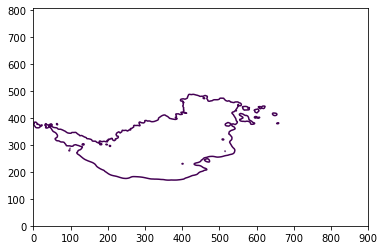

In [20]:
# Ross
xu_ocean = flux2.xu_ocean
yt_ocean = flux2.yt_ocean
count = 0
x_contour = []
y_contour = []
# Create the contour:
sc = plt.contour(flux2, levels=[-16])

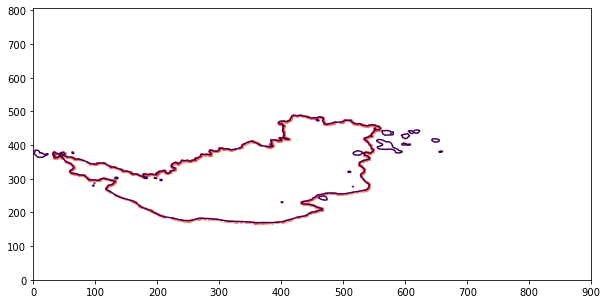

In [ ]:
for collection in sc.collections:
    for path in collection.get_paths():
        count += 1
        #print(np.shape(path.to_polygons()[0]))
        if count > 1: 
            # We only need the polygon from the first contour, which is the circumpolar contour
            break
        else:
            # Write down the lat/lon indices
            for ii in range(np.size(path.to_polygons()[0], 0)):
                x_contour.append(int(np.round(path.to_polygons()[0][ii][0])))
                y_contour.append(int(np.round(path.to_polygons()[0][ii][1])))

# convert list to array
x_contour = np.asarray(x_contour)
y_contour = np.asarray(y_contour)

# define a array
x_ross = np.zeros(982)
y_ross = np.zeros(982)

x = np.shape(y_contour)
x

fig = plt.figure(figsize=(10,5))
plt.contour(flux2, levels=[-16])
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

In [ ]:
x = np.shape(y_contour)
x

(982,)

In [ ]:
for i in range(982):
    for j in range(982):
        x_ross[i] = xu_ocean[x_contour[i]]
        y_ross[j] = yt_ocean[y_contour[j]]

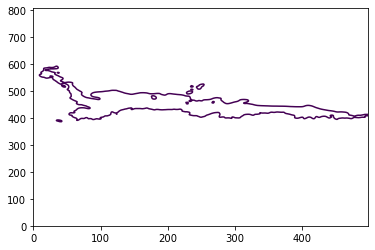

In [ ]:
# AABG
xu_ocean = flux3.xu_ocean
yt_ocean = flux3.yt_ocean
count = 0
x_contour = []
y_contour = []
# Create the contour:
sc = plt.contour(flux3, levels=[-13])

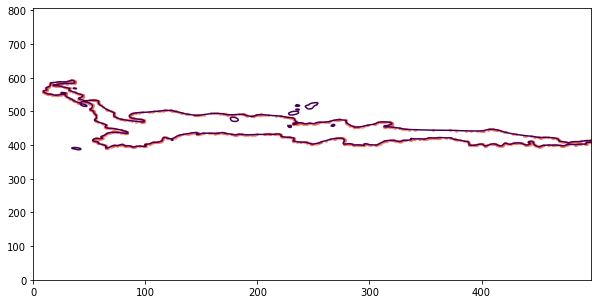

In [ ]:
for collection in sc.collections:
    for path in collection.get_paths():
        count += 1
        #print(np.shape(path.to_polygons()[0]))
        if count > 1: 
            # We only need the polygon from the first contour, which is the circumpolar contour
            break
        else:
            # Write down the lat/lon indices
            for ii in range(np.size(path.to_polygons()[0], 0)):
                x_contour.append(int(np.round(path.to_polygons()[0][ii][0])))
                y_contour.append(int(np.round(path.to_polygons()[0][ii][1])))

# convert list to array
x_contour = np.asarray(x_contour)
y_contour = np.asarray(y_contour)

# define a array
x_AABG = np.zeros(961)
y_AABG = np.zeros(961)

x = np.shape(y_contour)
x

fig = plt.figure(figsize=(10,5))
plt.contour(flux3, levels=[-13])
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

In [ ]:
x = np.shape(y_contour)
x

(961,)

In [ ]:
for i in range(961):
    for j in range(961):
        x_AABG[i] = xu_ocean[x_contour[i]]
        y_AABG[j] = yt_ocean[y_contour[j]]

In [ ]:
# combine them together
x_gyre = [x_weddell,x_ross,x_AABG]
y_gyre = [y_weddell,y_ross,y_AABG]

In [35]:
land = xr.where(np.isnan(ssh.rename('land')), 1, np.nan)

Text(0, 0.5, 'SSH (cm)')

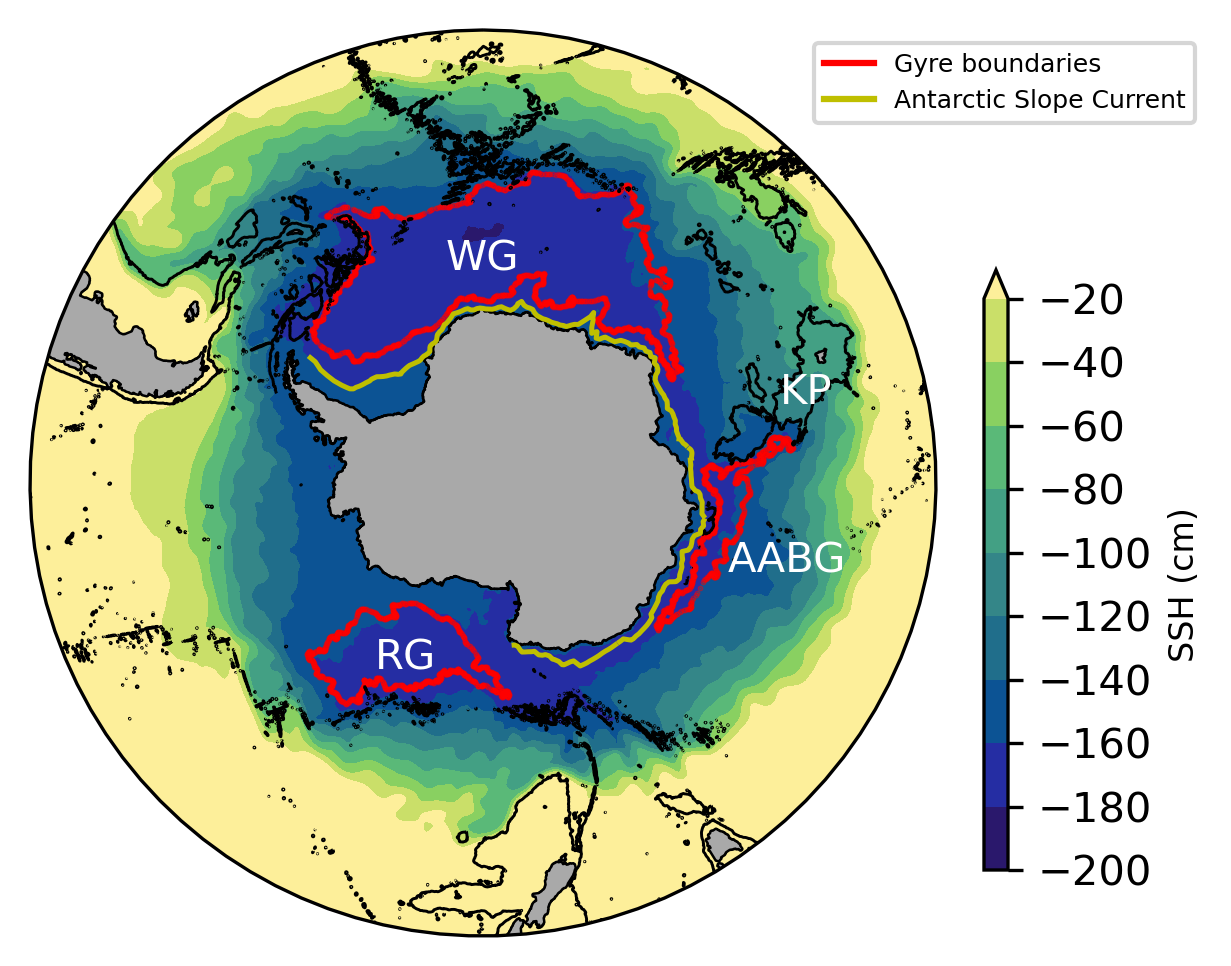

In [62]:
# plot the intro map
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = plt.subplot(1,1,1,projection = projection,facecolor="darkgrey")
plt.plot(1.,1.,'r')
plt.plot(1.,1.,'y')
plt.legend(['Gyre boundaries','Antarctic Slope Current'], fontsize = 6, loc = 'upper right',bbox_to_anchor=(1.3, 1))
#ax.gridlines(draw_labels=True)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = (ssh*100.).plot.contourf(ax=ax, levels =np.arange(-200,0,20),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.haline,add_colorbar = False)
land.plot.contourf(ax=ax, colors='darkgrey', zorder=2,
                       transform=ccrs.PlateCarree(), add_colorbar=False)
land.fillna(0).plot.contour(ax=ax, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False,linewidths = 0.6)
depth2.plot.contour(ax=ax,levels=[2500],linewidths = 0.7,colors=['k'],transform=ccrs.PlateCarree())
#flux_smooth1.plot.contour(ax=ax,levels=[-14],linewidths = 0.7,colors=['r'],linestyles = 'solid', transform=ccrs.PlateCarree())
plt.scatter(x_AABG, y_AABG,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
plt.scatter(x_ross, y_ross,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
plt.scatter(x_weddell, y_weddell,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
flux_asc1.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc2.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc3.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc4.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc5.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
ax.text(-10.,-65.,'WG',fontsize = 10,color = 'white',transform=ccrs.PlateCarree())
ax.text(-150.,-65.,'RG',fontsize = 10,color = 'white',transform=ccrs.PlateCarree())
ax.text(-250.,-60.,'AABG',fontsize = 10,color = 'white',transform=ccrs.PlateCarree())
ax.text(75.,-55.,'KP',fontsize = 10,color = 'white',transform=ccrs.PlateCarree())
#(ssh_front*100).plot.contour(ax=ax,levels=[-145],linewidths = 0.7,colors=['white'],linestyles = 'dashed',transform=ccrs.PlateCarree())
#ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
#ax.plot([60,60],[-90,-50],color='b',transform=ccrs.PlateCarree(),linewidth = 0.8)
#ax.plot([180,180],[-90,-50],color='b',transform=ccrs.PlateCarree(),linewidth = 0.8)
#ax.coastlines(resolution='100m')
#ax.add_feature(cft.LAND)
#ax.set_extent([-280,80,-82,-45], crs = ccrs.PlateCarree())

# colorbar 
ax = plt.axes([0.93, 0.18, 0.02, 0.5])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('SSH (cm)', fontsize = 8)